# Goethe University RTKS 2024 exam result analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the CSV data


In [2]:
rtks_df = pd.read_csv("RTKS erste Klausur.csv", header=None)
rtks_df.columns = ["MN", "Notes"]
rtks_df.index += 1
rtks_df

,MN,Notes
1,xx00655,3+
2,xx04441,2+
3,xx04762,3
4,xx04886,2-
5,xx05606,3+
...,...,...
189,xx97112,3
190,xx98221,3
191,xx98461,3-
192,xx99273,1


In [3]:
rtks_df.size

386

### Clean the data before comparing them


In [4]:
# remove '+' and '-' signs
rtks_df["Notes"] = rtks_df["Notes"].str.replace('+', ' ').str.replace('-', ' ')
# convert obeject type to int
rtks_df["Notes"] = pd.to_numeric(rtks_df["Notes"], errors='coerce').fillna(0).astype(int)
rtks_df

,MN,Notes
1,xx00655,3
2,xx04441,2
3,xx04762,3
4,xx04886,2
5,xx05606,3
...,...,...
189,xx97112,3
190,xx98221,3
191,xx98461,3
192,xx99273,1


### Categorize the grades and add a column

In [5]:
bins = [1,2,3,4,5]
labels = ["very good", "good","satisfactory", "Failed"]
rtks_df["Category"] = pd.cut(rtks_df["Notes"], bins=bins, labels = labels, right = False)
rtks_df

,MN,Notes,Category
1,xx00655,3,satisfactory
2,xx04441,2,good
3,xx04762,3,satisfactory
4,xx04886,2,good
5,xx05606,3,satisfactory
...,...,...,...
189,xx97112,3,satisfactory
190,xx98221,3,satisfactory
191,xx98461,3,satisfactory
192,xx99273,1,very good


### Visualize the data using pie chart 

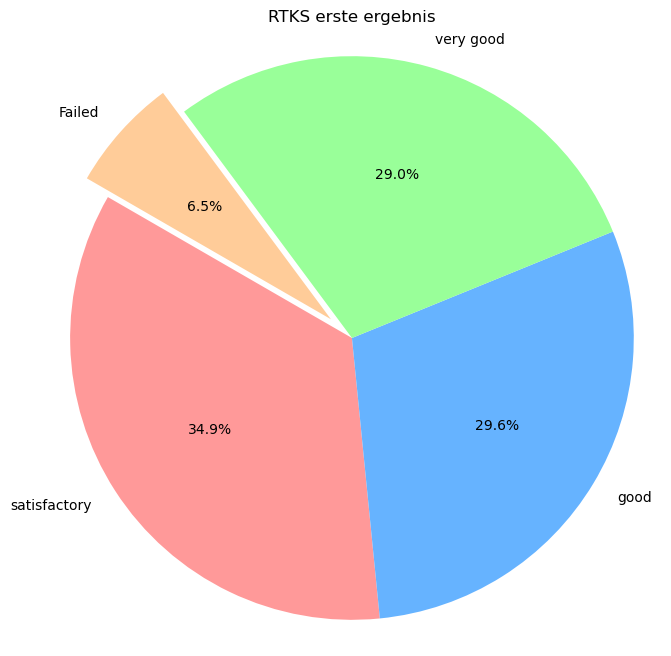

In [9]:
category_counts = rtks_df["Category"].value_counts()
labels = category_counts.index.tolist()
explode = (0, 0, 0, 0.1)
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=labels, explode =explode, autopct='%1.1f%%', startangle=150,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("RTKS erste ergebnis")
plt.axis("equal")
plt.show()

### Author: 
#####               Solomon Mengesha Kebede 